In [40]:
import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
%matplotlib inline

In [41]:
#load in the data

fname1 = 'attendance_data_16-17.csv'
fname2 = 'attendance_data_17-18.csv'

columns = ('id', 'grade', 'age', 'school', 'sex', 'homeless', 'disadvantaged', 'specialneeds',
           'excused1', 'unexcused1', 'tardy1',
           'excused2', 'unexcused2', 'tardy2',
           'excused3', 'unexcused3', 'tardy3',
           'excused4', 'unexcused4', 'tardy4')

y1_data = pd.read_csv(fname1, skiprows=[0], names=columns)
y2_data = pd.read_csv(fname2, skiprows=[0], names=columns)

#use student IDs as the index
y1_data.set_index('id', inplace=True)
y2_data.set_index('id', inplace=True)

In [42]:
pd.unique(y1_data['specialneeds'])

array([nan, '504', 'IEP'], dtype=object)

In [43]:
#do some data cleaning

#in "disadvantaged" column, replace "YES" with 1 and NaN with 0
y1_data['disadvantaged'] = y1_data['disadvantaged'].map({np.nan: 0, 'YES': 1})
y2_data['disadvantaged'] = y2_data['disadvantaged'].map({np.nan: 0, 'YES': 1})

#in "specialneeds" column, 
y1_data['specialneeds'] = y1_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})
y2_data['specialneeds'] = y2_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})


#replace '---' with 0 (Fourth marking period columns)
y1_data.replace('---', 0, inplace=True)
y2_data.replace('---', 0, inplace=True)

In [44]:
y1_data[y1_data['school'] == 1]

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,excused2,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4
id,,,,,,,,,,,,,,,,,,,
300053,10,16,1,F,N,1,0,22,0,0,0,0,0,0,0,1,2,2,0
300339,12,18,1,F,N,0,0,4,2,4,13,9,6,27,15,5,36,15,7
300340,11,17,1,M,N,0,0,1,0,0,5,1,1,3,0,5,24,0,1
300344,9,15,1,M,N,0,0,0,0,0,15,0,0,0,1,0,3,0,0
300628,11,17,1,F,N,0,0,2,1,1,0,0,3,6,0,5,2,4,11
300630,9,15,1,M,N,0,NaN,1,0,1,0,0,0,0,1,0,2,1,2
300908,11,18,1,F,N,0,0,1,0,0,4,0,1,3,0,3,0,9,6
300909,9,17,1,M,N,0,IEP,27,0,1,16,0,0,5,0,0,15,0,0
301188,11,17,1,M,N,0,NaN,0,0,1,15,0,1,5,1,0,6,0,2


In [45]:
grade9 = y1_data['grade'] == '9'
grade10 = y1_data['grade'] == '10'
grade11 = y1_data['grade'] == '11'
grade12 = y1_data['grade'] == '12'

hs_students = y1_data.loc[grade9 | grade10 | grade11 | grade12]

#get students' gender

#tally up number of absences per student

#make a histogram of absenses by gender

In [46]:
hs_students.head()

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,excused2,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4
id,,,,,,,,,,,,,,,,,,,
300053,10,16,1,F,N,1,0,22,0,0,0,0,0,0,0,1,2,2,0
300339,12,18,1,F,N,0,0,4,2,4,13,9,6,27,15,5,36,15,7
300340,11,17,1,M,N,0,0,1,0,0,5,1,1,3,0,5,24,0,1
300344,9,15,1,M,N,0,0,0,0,0,15,0,0,0,1,0,3,0,0
300628,11,17,1,F,N,0,0,2,1,1,0,0,3,6,0,5,2,4,11


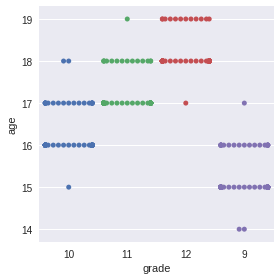

In [47]:
sns.factorplot(data=hs_students, x='grade', y='age', kind='swarm')